# Mohamed sayed awwad

## task 6

## prediction using decesion trees
 

In [43]:
# importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

## Reading data

In [7]:
#reading the values
df =pd.read_csv("Iris.csv",index_col=0)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.shape

(150, 5)

In [10]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### plotting and visualizing data

Text(0.5, 1.0, 'PetalWidthCm , species')

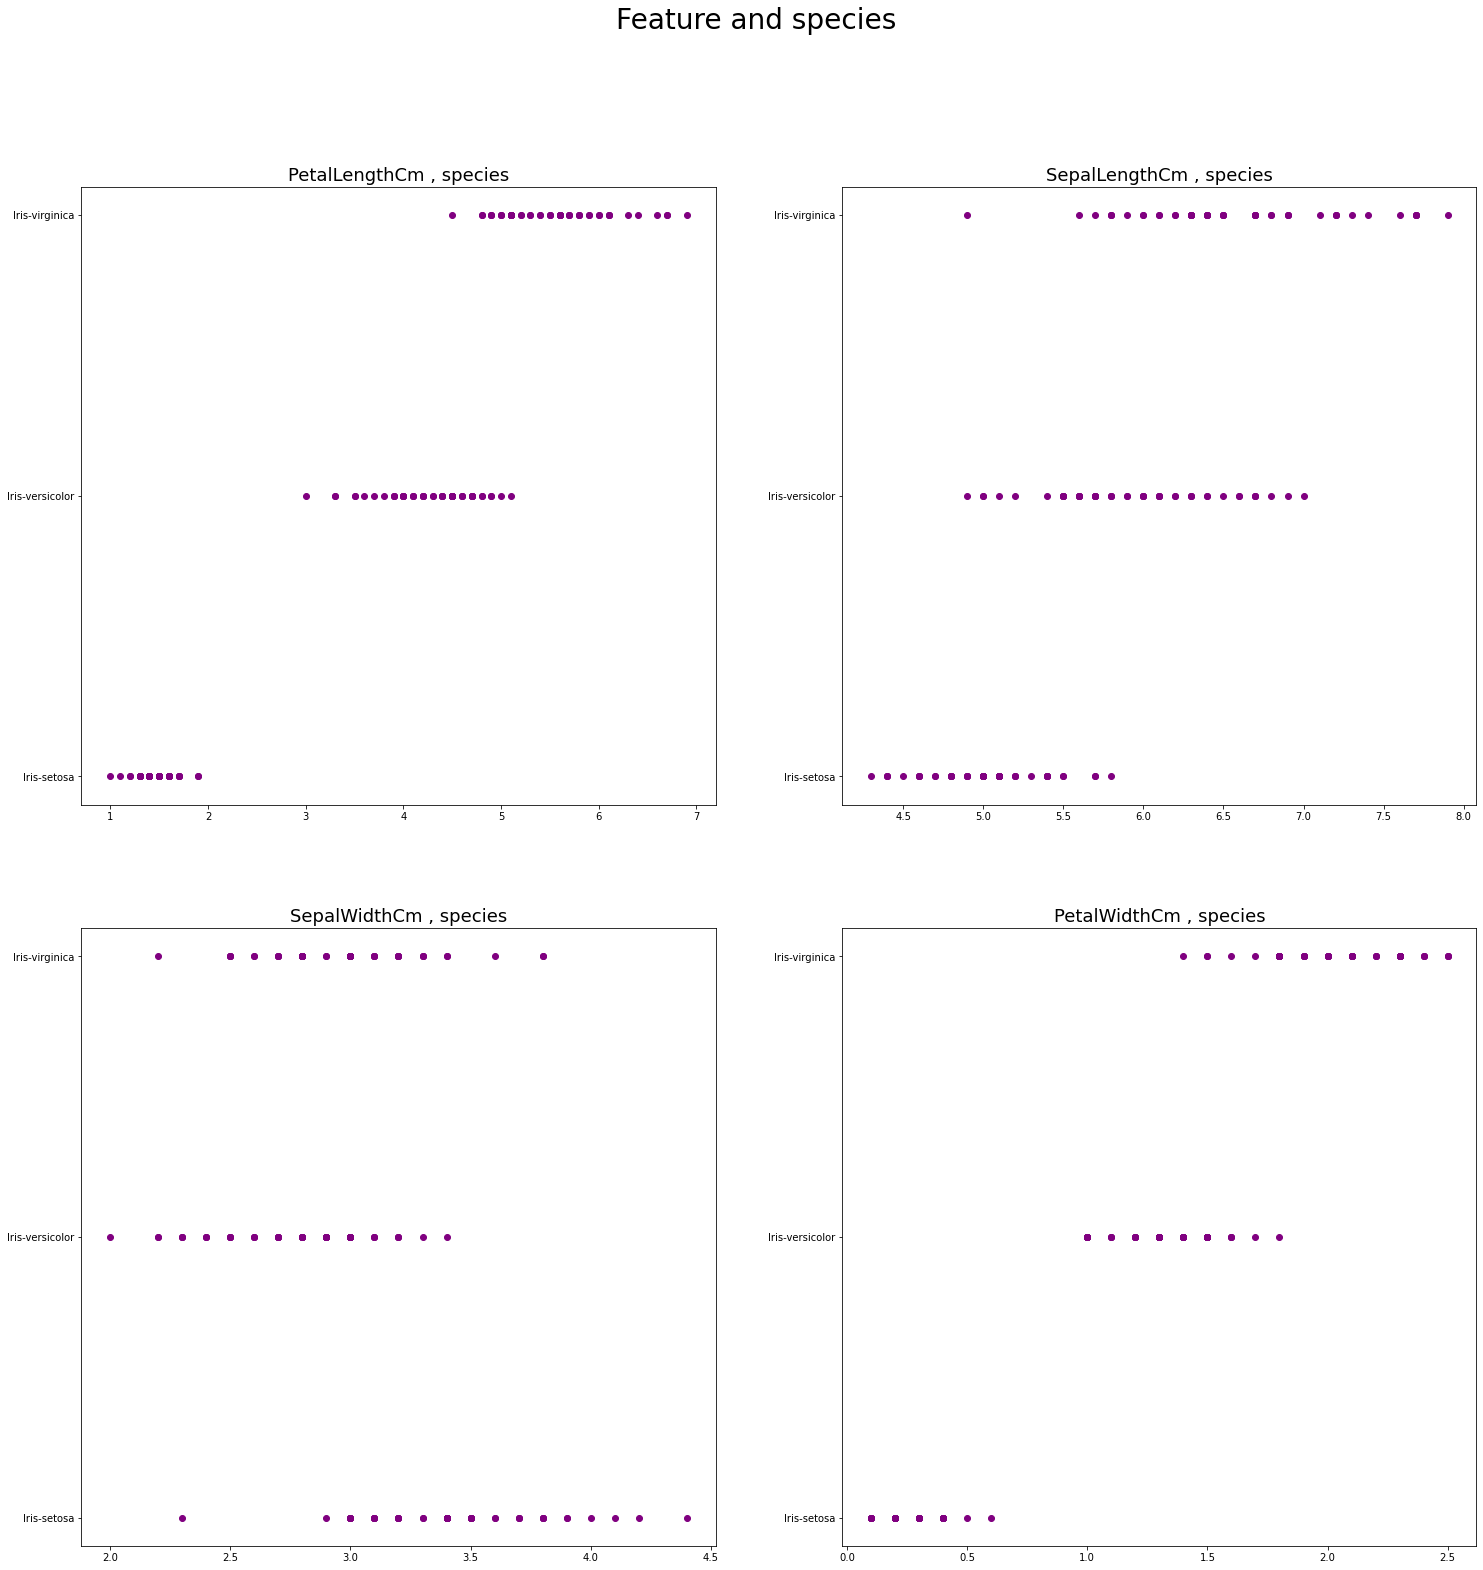

In [38]:
#here we split the plot into 4 sections , each section has one of the features on x-axis while species on y-axis 
figure, axs= plt.subplots(2,2, figsize=(25,25))

figure.suptitle("Feature and species", fontsize=28)

axs[0,0].scatter(df["PetalLengthCm"], df["Species"], color = 'purple')
axs[0,0].set_title("PetalLengthCm , species",fontsize=18)

axs[0,1].scatter(df["SepalLengthCm"], df["Species"], color = 'purple')
axs[0,1].set_title("SepalLengthCm , species",fontsize=18)

axs[1,0].scatter(df["SepalWidthCm"], df["Species"], color = 'purple')
axs[1,0].set_title("SepalWidthCm , species",fontsize=18)

axs[1,1].scatter(df["PetalWidthCm"], df["Species"], color = 'purple')
axs[1,1].set_title("PetalWidthCm , species",fontsize=18)

## split data to 80% training and 20% testing

In [39]:
#assign all the matrix to X except the last colomn
#assign species to Y
X=df.iloc[:,:-1].values
Y=df["Species"]

In [37]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state=3)
print(np.shape(x_train),np.shape(x_test))

(120, 4) (30, 4)


In [40]:
# Perform cross validation.

Maxdepth_List = list(range(1,11))
score_tree = []
for m in Maxdepth_List:
    classifier = DecisionTreeClassifier(criterion="entropy",max_depth=m,random_state=3)
    scores_tree = cross_val_score(classifier, x_train, y_train, cv=10, scoring='accuracy')
    score_tree.append(scores_tree.mean())
print(score_tree)
best_depth = Maxdepth_List[score_tree.index(max(score_tree))]
print('\nThe optimal number of levels is %d.' % best_depth)

[0.6666666666666667, 0.9333333333333333, 0.9333333333333333, 0.9416666666666667, 0.9416666666666667, 0.9416666666666667, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333]

The optimal number of levels is 4.


## visualizig the tree

In [41]:
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=best_depth,random_state=3)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=3)

In [44]:
features=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
classes=['Iris-setosa','Iris-versicolor','Iris-virginca']


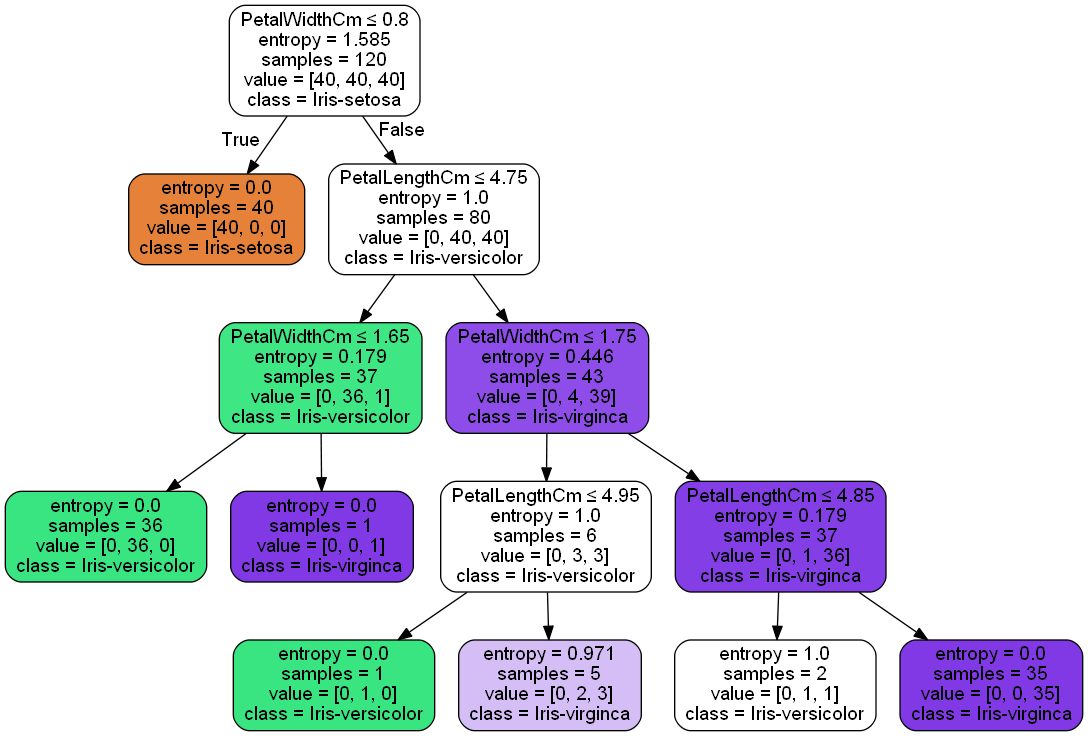

In [45]:
features=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
classes=['Iris-setosa','Iris-versicolor','Iris-virginca']
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=classes)
tree = pydotplus.graph_from_dot_data(dot_data.getvalue())
tree.write_png('tree.png')
Image(tree.create_png())

In [46]:
y_pred = classifier.predict(x_test)


## Accuracy

In [47]:
accuracy_tree = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % accuracy_tree)

Accuracy: 0.97
